<a href="https://colab.research.google.com/github/ella13162/DataScience/blob/main/ABI_Week_5_Linear_Regr_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression is a supervised machine learning algorithm, where we are attempting to find a straight line (y = a + b*x) that best fits (represents) our data.

In the previous equation x: input features (columns of the dataset), and y: output feature / label / target (typically last column of the dataset).

y1 = a + b*x1   |
                  
y2 = a + b*x2   | ==> y1,x1,y2,x2 known values => calculate a, b

For multiple features, the above equation (y = a + b*x) is written as:
y = a + b1*x1 + b2*x2 + b3*x3 + ... + bn*xn

OR

y = a + B*X where B = [b1 b2 b3 ... bn], X = [x1 x2 x3 ... xn]T, and n: the total amount of input features


![img](https://editor.analyticsvidhya.com/uploads/375512.jpg)


If the data points fall on the line, then they are fitted perfectly, while data points that fall above or below the line, they are not fitted perfectly and have an error (the distance of the data point from the line).

This line also gives predictions to values that we feed within our model, and based on these we can calculate the error prediction (error = y_actual - y_pred).

Types of performance metrics:
- Mean Squared Error ( mse = error^2 = (y_actual - y_pred)^2 )
- Square Root of Mean Squared Error ( sq_mse = (mse)^(1/2) = |y_actual - y_pred| )
- Mean Absolute Error ( mae = |y_actual - y_pred| )
- R2 Coefficient: takes values from 0 to 1, the higher the value, the better the linear regression model we have constructed

In [ ]:
from google.colab import files

file = files.upload()

Saving insurance.csv to insurance (1).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('insurance.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.isnull().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
data.duplicated().sum()
data.shape

(1338, 7)

In [ ]:
data[data.duplicated(keep=False)]  # By setting keep on False, all duplicates are True.

,age,gender,bmi,children,smoker,region,charges


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()
data.shape

(1337, 7)

In [ ]:
display(data['gender'].value_counts())
display(data['smoker'].value_counts())
display(data['region'].value_counts())

male      675
female    662
Name: gender, dtype: int64

no     1063
yes     274
Name: smoker, dtype: int64

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

le_gender = LabelEncoder()
le_smoker = LabelEncoder()
le_region = LabelEncoder()

le_gender.fit(data['gender'].drop_duplicates())
le_smoker.fit(data['smoker'].drop_duplicates())
le_region.fit(data['region'].drop_duplicates())

data['gender_enc'] = le_gender.transform(data['gender'])
data['smoker_enc'] = le_smoker.transform(data['smoker'])
data['region_enc'] = le_region.transform(data['region'])
data

,age,gender,bmi,children,smoker,region,charges,gender_enc,smoker_enc,region_enc
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,2
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,3


In [ ]:
ct = ColumnTransformer( [ ('ohe', OneHotEncoder(), ['region']) ], remainder='passthrough' )
# The remainder is initialized to passthrough means the column which we have not used in any transformation process should be pass as it is.
trans = ct.fit_transform(data)
trans

array([[0.0, 0.0, 0.0, ..., 0, 1, 3],
       [0.0, 0.0, 1.0, ..., 1, 0, 2],
       [0.0, 0.0, 1.0, ..., 1, 0, 2],
       ...,
       [0.0, 0.0, 1.0, ..., 0, 0, 2],
       [0.0, 0.0, 0.0, ..., 0, 0, 3],
       [0.0, 1.0, 0.0, ..., 0, 1, 1]], dtype=object)

In [ ]:
ins_data = pd.DataFrame(trans, columns=ct.get_feature_names_out())

list(ins_data.columns)

['ohe__region_northeast',
 'ohe__region_northwest',
 'ohe__region_southeast',
 'ohe__region_southwest',
 'remainder__age',
 'remainder__gender',
 'remainder__bmi',
 'remainder__children',
 'remainder__smoker',
 'remainder__charges',
 'remainder__gender_enc',
 'remainder__smoker_enc',
 'remainder__region_enc']

In [ ]:
ins_data.head()

,ohe__region_northeast,ohe__region_northwest,ohe__region_southeast,ohe__region_southwest,remainder__age,remainder__gender,remainder__bmi,remainder__children,remainder__smoker,remainder__charges,remainder__gender_enc,remainder__smoker_enc,remainder__region_enc
0,0.0,0.0,0.0,1.0,19,female,27.9,0,yes,16884.924,0,1,3
1,0.0,0.0,1.0,0.0,18,male,33.77,1,no,1725.5523,1,0,2
2,0.0,0.0,1.0,0.0,28,male,33.0,3,no,4449.462,1,0,2
3,0.0,1.0,0.0,0.0,33,male,22.705,0,no,21984.47061,1,0,1
4,0.0,1.0,0.0,0.0,32,male,28.88,0,no,3866.8552,1,0,1


In [ ]:
#rename columns
ins_data.columns = ['region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest',
 'age',
 'gender',
 'bmi',
 'children',
 'smoker',
 'charges',
 'gender_enc',
 'smoker_enc',
 'region_enc']

In [ ]:
#reorder columns
ins_data = ins_data[[ 'age',
                      'gender',
                      'gender_enc',
                      'bmi',
                      'children',
                      'smoker',
                      'smoker_enc',
                      'region_enc',
                      'region_northeast',
                      'region_northwest',
                      'region_southeast',
                      'region_southwest',
                      'charges'
]]

In [ ]:
#remove object columns, save into new dataset, and covnert to numeric
ins_data_t = ins_data[[ 'age',
                      'gender_enc',
                      'bmi',
                      'children',
                      'smoker_enc',
                      'region_enc',
                      'region_northeast',
                      'region_northwest',
                      'region_southeast',
                      'region_southwest',
                      'charges'
]]

ins_data_t = ins_data_t.apply(pd.to_numeric)
ins_data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   gender_enc        1337 non-null   int64  
 2   bmi               1337 non-null   float64
 3   children          1337 non-null   int64  
 4   smoker_enc        1337 non-null   int64  
 5   region_enc        1337 non-null   int64  
 6   region_northeast  1337 non-null   float64
 7   region_northwest  1337 non-null   float64
 8   region_southeast  1337 non-null   float64
 9   region_southwest  1337 non-null   float64
 10  charges           1337 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 115.0 KB


In [ ]:
df_corr = ins_data_t[['age',
                      'gender_enc',
                      'bmi',
                      'children',
                      'smoker_enc',
                      'charges'
                    ]].corr()

df_corr

,age,gender_enc,bmi,children,smoker_enc,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.298308
gender_enc,-0.019814,1.000000,0.046397,0.017848,0.076596,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.067389
smoker_enc,-0.025587,0.076596,0.003746,0.007331,1.000000,0.787234
charges,0.298308,0.058044,0.198401,0.067389,0.787234,1.000000


<Axes: >

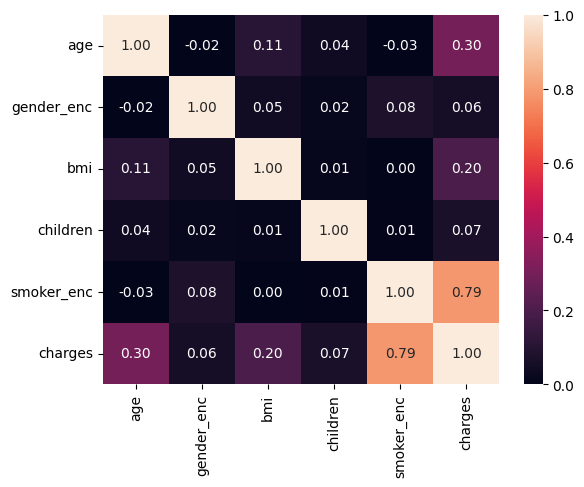

In [ ]:
sns.heatmap(df_corr, vmin=0, vmax=1, annot=True, fmt='.2f')

In [ ]:
from sklearn.model_selection import train_test_split

df_feat = data[['age','gender_enc', 'bmi', 'children', 'smoker_enc', 'charges'
                    ]]

X = df_feat.iloc[:, 0:-1]
y = df_feat.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=54, test_size=0.3)

In [ ]:
print(1337*0.7)

935.9


In [ ]:
X_train

,age,gender_enc,bmi,children,smoker_enc
194,18,1,34.430,0,0
702,53,1,41.470,0,0
245,54,1,30.020,0,0
490,19,0,32.900,0,0
1082,38,1,19.950,1,0
...,...,...,...,...,...
1034,61,1,38.380,0,0
17,23,1,23.845,0,0
1048,25,0,22.515,1,0
899,19,0,22.515,0,0


In [ ]:
X_test

,age,gender_enc,bmi,children,smoker_enc
1304,42,1,24.605,2,1
390,48,1,35.625,4,0
798,58,0,33.100,0,0
757,47,0,27.830,0,1
1028,54,1,31.600,0,0
...,...,...,...,...,...
1133,52,0,18.335,0,0
480,63,1,41.325,3,0
323,57,1,40.945,0,0
596,42,0,29.480,2,0


In [ ]:
y_train

194      1137.46970
702      9504.31030
245     24476.47851
490      1748.77400
1082     5855.90250
           ...     
1034    12950.07120
17       2395.17155
1048     3594.17085
899      2117.33885
1136     7623.51800
Name: charges, Length: 935, dtype: float64

In [ ]:
y_test

1304    21259.37795
390     10736.87075
798     11848.14100
757     23065.42070
1028     9850.43200
           ...     
1133     9991.03765
480     15555.18875
323     11566.30055
596      7640.30920
512      9361.32680
Name: charges, Length: 402, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train) # is learning

LinearRegression()

In [ ]:
# y = a + B*X
# a = model.intercept_
# B = model.coef_
model.intercept_, model.coef_
 # y = -12309.483437837242 + 269.28736655+ 243.18126926+ 319.11339523+ 327.02518904+ 23698.83696813

(-12309.483437837242,
 array([  269.28736655,   243.18126926,   319.11339523,   327.02518904,
        23698.83696813]))

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_pred, y_test)
sqrt_mse = np.sqrt(mse)
mae = mean_absolute_error(y_pred, y_test)

print(f"MSE : {mse:.3f}, MSE_SQRT : {sqrt_mse:.3f}, MAE : {mae:.3f}")

r2 = model.score(X_test, y_test)#cooficient of determination is explaining for what extend module is accured
print(f"R2 score: {r2:.3f}")

MSE : 35955812.817, MSE_SQRT : 5996.317, MAE : 4125.987
R2 score: 0.741


In [ ]:
df_feat['charges'].min(), df_feat['charges'].max(), df_feat['charges'].max() - df_feat['charges'].min()

(1121.8739, 63770.42801, 62648.554110000005)

In [ ]:
df_feat.columns

Index(['age', 'gender_enc', 'bmi', 'children', 'smoker_enc', 'charges'], dtype='object')

In [ ]:
val = model.predict( [[25, 0, 20.9, 1, 0]] )

print('Predicted insurance charges = ', val)

Predicted insurance charges =  [1419.19587526]
